In [125]:
%matplotlib inline
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

#Instantiate locations of data files
cityData = 'Resources/city_data.csv'
rideData = 'Resources/ride_data.csv'

#Reading city_data.csv to a DataFrame
cityDf = pd.read_csv(cityData)
cityDf.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [126]:
#Reading ride_data.csv to a DataFrame
rideDf = pd.read_csv(rideData)
rideDf.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [127]:
#checking for missing values
cityDf.count()

city            120
driver_count    120
type            120
dtype: int64

In [128]:
#Checking for missing values
cityDf.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [129]:
#Checking data types
cityDf.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [130]:
#Getting the different city types
cityDf['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [131]:
#Getting the count of "Urban" data points
sum(cityDf['type']=='Urban')

66

In [132]:
#Getting the count of "Rural" data points
sum(cityDf['type']=='Rural')

18

In [133]:
#Getting the count of "Suburban" data points
sum(cityDf['type']=='Suburban')

36

In [134]:
#Checking rideDf for missing values
rideDf.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [135]:
#Checking rideDf for missing values
rideDf.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [136]:
#Checking rideDf data types
rideDf.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [137]:
#Combining the data into a single dataset
pyberDataDf = pd.merge(rideDf, cityDf, how='left', on=['city','city'])
pyberDataDf.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [138]:
#Creating Urban city DataFrame
urbanCitiesDf = pyberDataDf[pyberDataDf['type']=='Urban']
#Creating Rural city DataFrame
ruralCitiesDf = pyberDataDf[pyberDataDf['type']=='Rural']
#Creating Suburban city DataFrame
subCitiesDf = pyberDataDf[pyberDataDf['type']=='Suburban']

In [139]:
# Getting the number of rides for urban cities.
urbanRideCount = urbanCitiesDf.groupby(['city']).count()['ride_id']
subRideCount = subCitiesDf.groupby(['city']).count()['ride_id']
ruralRideCount = ruralCitiesDf.groupby(['city']).count()['ride_id']
urbanRideCount.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [140]:
# Getting average fare for each city in the urban cities.
urbanAvgFare = urbanCitiesDf.groupby(['city']).mean()['fare']
ruralAvgFare = ruralCitiesDf.groupby(['city']).mean()['fare']
subAvgFare = subCitiesDf.groupby(['city']).mean()['fare']
urbanAvgFare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [141]:
urbanDriverCount = urbanCitiesDf.groupby(['city']).mean()['driver_count']
ruralDriverCount = ruralCitiesDf.groupby(['city']).mean()['driver_count']
subDriverCount = subCitiesDf.groupby(['city']).mean()['driver_count']
urbanDriverCount.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

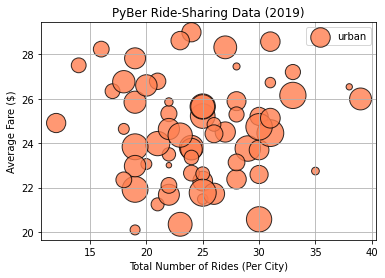

In [142]:
# Building the scatter plots for urban cities.
plt.scatter(urbanRideCount, urbanAvgFare, 
            s=10*urbanDriverCount, c='coral', 
            edgecolor='black',linewidths=1,
            alpha=0.8, label='urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

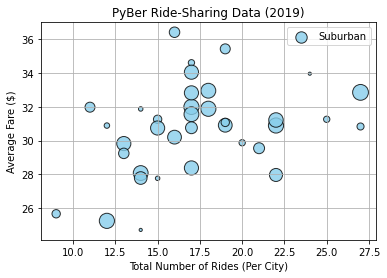

In [143]:
# Building the scatter plots for suburban cities.
plt.scatter(subRideCount, subAvgFare, 
            s=10*subDriverCount, c='skyblue', 
            edgecolor='black',linewidths=1,
            alpha=0.8, label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

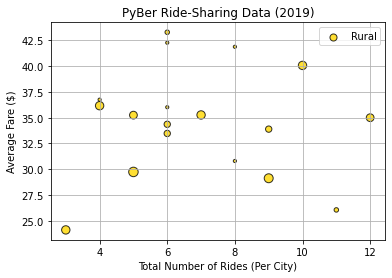

In [144]:
# Building the scatter plots for rural cities.
plt.scatter(ruralRideCount, ruralAvgFare, 
            s=10*ruralDriverCount, c='gold', 
            edgecolor='black',linewidths=1,
            alpha=0.8, label='Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

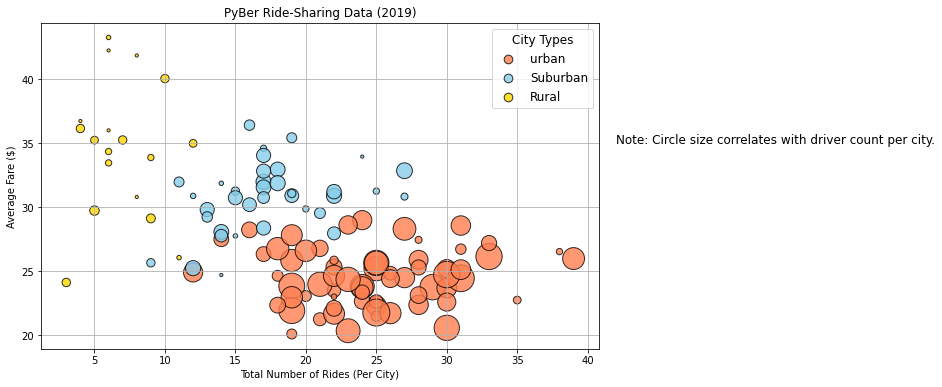

In [145]:
# Building the scatter plots for urban cities.
plt.subplots(figsize=(10,6))
plt.scatter(urbanRideCount, urbanAvgFare, 
            s=10*urbanDriverCount, c='coral', 
            edgecolor='black',linewidths=1,
            alpha=0.8, label='urban')


# Building the scatter plots for suburban cities.
plt.scatter(subRideCount, subAvgFare, 
            s=10*subDriverCount, c='skyblue', 
            edgecolor='black',linewidths=1,
            alpha=0.8, label='Suburban')



# Building the scatter plots for rural cities.
plt.scatter(ruralRideCount, ruralAvgFare, 
            s=10*ruralDriverCount, c='gold', 
            edgecolor='black',linewidths=1,
            alpha=0.8, label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize="12")
#saving the figure
plt.savefig('Analysis/Fig1.png')
plt.show()

In [146]:
# Getting statistical info of urban cities
urbanCitiesDf.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [147]:
# Getting statistical info of rural cities
ruralCitiesDf.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [148]:
# Getting statistical info of suburban cities
subCitiesDf.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [149]:
# Getting statistical info of urban cities ride count data
urbanRideCount.describe()


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [150]:
# Getting statistical info of rural cities ride count data
ruralRideCount.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [151]:
# Getting statistical info of suburban cities ride count data
subRideCount.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [152]:
#Calculating the average ride count for each city type
round(urbanRideCount.mean(),2), round(subRideCount.mean(),2), round(ruralRideCount.mean(),2)

(24.62, 17.36, 6.94)

In [153]:
#Calculating the median ride count for urban cities
round(urbanRideCount.median(),2)

24.0

In [154]:
# Calculating the mode of the ride count for the urban cities.
urbanRideCount.mode()

0    22
1    25
dtype: int64

In [155]:
# Calculating the mode of the ride count for the suburban cities.
subRideCount.mode()

0    17
dtype: int64

In [156]:
# Calculating the mode of the ride count for the rural cities.

In [157]:
ruralRideCount.mode()

0    6
dtype: int64

In [158]:
# Calculating the measures of central tendency for the ride count for the urban cities.
meanUrbanRideCount = np.mean(urbanRideCount)
print(f'The mean for the ride counts for urban trips is {meanUrbanRideCount:.2f}')

medianUrbanRideCount = np.median(urbanRideCount)
print(f'The median for the ride counts for urban trips is {medianUrbanRideCount:.2f}')

modeUrbanRideCount = sts.mode(urbanRideCount)
print(f'The median for the ride counts for urban trips is {modeUrbanRideCount}.')

The mean for the ride counts for urban trips is 24.62
The median for the ride counts for urban trips is 24.00
The median for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [159]:
modeSubRideCount = sts.mode(subRideCount)
print(f'The median for the ride counts for urban trips is {modeSubRideCount}.')

The median for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [160]:
modeRuralRideCount = sts.mode(ruralRideCount)
print(f'The median for the ride counts for urban trips is {modeRuralRideCount}.')

The median for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [161]:
# Getting the fares for the urban cities.
urbanFares = urbanCitiesDf['fare']
urbanFares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [162]:
meanUrbanFares = np.mean(urbanFares)
print(f'The mean for the urban fares is ${meanUrbanFares:.2f}')

medianUrbanFares = np.median(urbanFares)
print(f'The median for the urban fares is ${medianUrbanFares:.2f}')

modeUrbanFares = sts.mode(urbanFares)
print(f'The mode for the urban fares is {modeUrbanFares}')

The mean for the urban fares is $24.53
The median for the urban fares is $24.64
The mode for the urban fares is ModeResult(mode=array([22.86]), count=array([5]))


In [163]:

ruralFares = ruralCitiesDf['fare']


meanRuralFares = np.mean(ruralFares)
print(f'The mean for the rural fares is ${meanRuralFares:.2f}')

medianRuralFares = np.median(ruralFares)
print(f'The median for the rural fares is ${medianRuralFares:.2f}')

modeRuralFares = sts.mode(ruralFares)
print(f'The mode for the rural fares is {modeRuralFares}')

The mean for the rural fares is $34.62
The median for the rural fares is $37.05
The mode for the rural fares is ModeResult(mode=array([37.05]), count=array([2]))


In [164]:
subFares = subCitiesDf['fare']

meanSubFares = np.mean(subFares)
print(f'The mean for the sub fares is ${meanSubFares:.2f}')

medianSubFares = np.median(subFares)
print(f'The median for the sub fares is ${medianSubFares:.2f}')

modeSubFares = sts.mode(subFares)
print(f'The mode for the sub fares is {modeSubFares}')

The mean for the sub fares is $30.97
The median for the sub fares is $30.75
The mode for the sub fares is ModeResult(mode=array([17.99]), count=array([3]))


In [165]:
#Creating series of each cities driver count
urbanDrivers = urbanCitiesDf['driver_count']
ruralDrivers = ruralCitiesDf['driver_count']
subDrivers = subCitiesDf['driver_count']
urbanDrivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [166]:
#Calculations for driver count by urban city type

meanUrbanDrivers = np.mean(urbanDrivers)
print(f'The mean for the urban driver count is {meanUrbanDrivers:.2f}')

medianUrbanDrivers = np.median(urbanDrivers)
print(f'The median for the urban driver count is {medianUrbanDrivers:.2f}')

modeUrbanDrivers = sts.mode(urbanDrivers)
print(f'The mode for the urban driver count is {modeUrbanDrivers}')

The mean for the urban driver count is 36.68
The median for the urban driver count is 37.00
The mode for the urban driver count is ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [167]:
#Calculations for driver count by rural city type

meanRuralDrivers = np.mean(ruralDrivers)
print(f'The mean for the rural driver count is {meanRuralDrivers:.2f}')

medianRuralDrivers = np.median(ruralDrivers)
print(f'The median for the rural driver count is {medianRuralDrivers:.2f}')

modeRuralDrivers = sts.mode(ruralDrivers)
print(f'The mode for the rural driver count is {modeRuralDrivers}')

The mean for the rural driver count is 4.30
The median for the rural driver count is 4.00
The mode for the rural driver count is ModeResult(mode=array([1], dtype=int64), count=array([32]))


In [168]:
#Calculations for driver count by suburban city type

meanSubDrivers = np.mean(subDrivers)
print(f'The mean for the sub driver count is {meanSubDrivers:.2f}')

medianSubDrivers = np.median(subDrivers)
print(f'The median for the sub driver count is {medianSubDrivers:.2f}')

modeSubDrivers = sts.mode(subDrivers)
print(f'The mode for the sub driver count is {modeSubDrivers}')

The mean for the sub driver count is 13.71
The median for the sub driver count is 16.00
The mode for the sub driver count is ModeResult(mode=array([20], dtype=int64), count=array([79]))


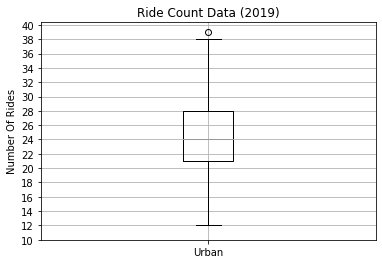

In [169]:
# Creating a box-and-whisker plot for the urban cities ride count.
xLabels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urbanRideCount, labels=xLabels)
#Adding title, labels and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number Of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

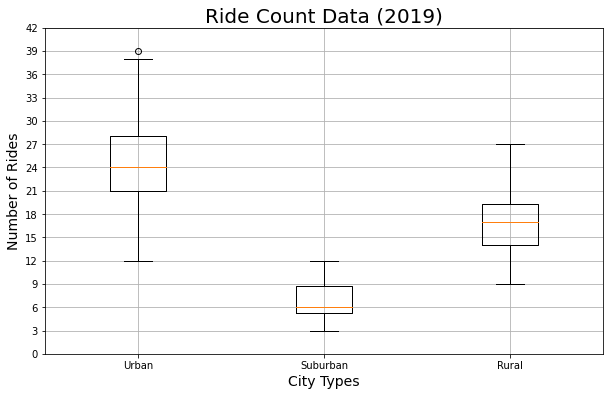

In [170]:
# Add all ride count box-and-whisker plots to the same graph.
xLabels = ['Urban','Suburban','Rural']
rideCountData = [urbanRideCount, ruralRideCount, subRideCount]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(rideCountData, labels=xLabels)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()
#saving figure
plt.savefig('Analysis/Fig2.png')
plt.show()

In [171]:
# Getting the city that matches 39.

urbanCityOutlier = urbanRideCount[urbanRideCount==39].index[0]
print(f'{urbanCityOutlier} has the highest rider count')

West Angela has the highest rider count


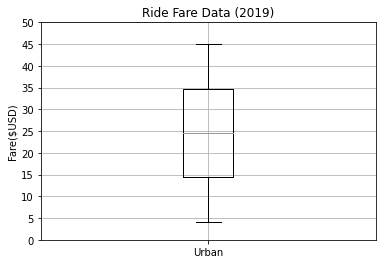

Summary Statistics


<bound method NDFrame.describe of 0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64>

In [172]:
# Add urban fare box-and-whisker 
xLabels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urbanFares, labels=xLabels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urbanFares.describe

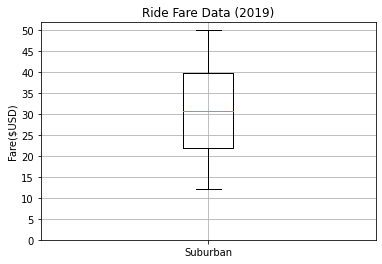

Summary Statistics


<bound method NDFrame.describe of 1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
        ...  
2245    13.92
2246    12.76
2247    27.70
2248    47.41
2249    17.97
Name: fare, Length: 625, dtype: float64>

In [173]:
# Add suburban fare box-and-whisker 
xLabels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(subFares, labels=xLabels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
subFares.describe

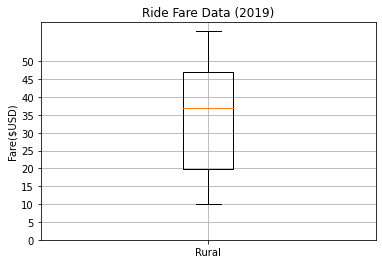

Summary Statistics


<bound method NDFrame.describe of 2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
        ...  
2370    13.38
2371    20.76
2372    11.11
2373    44.94
2374    55.84
Name: fare, Length: 125, dtype: float64>

In [174]:
# Add rural fare box-and-whisker 
xLabels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(ruralFares, labels=xLabels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
ruralFares.describe

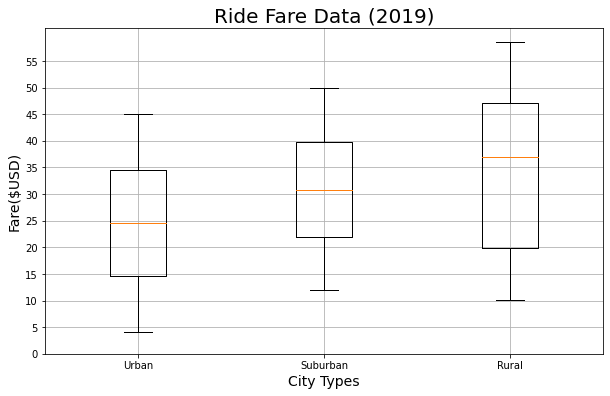

In [175]:
# Add all ride fare box-and-whisker plots to the same graph.
xLabels = ['Urban','Suburban','Rural']
rideFareData = [urbanFares, subFares,ruralFares]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(rideFareData, labels=xLabels)
ax.set_yticks(np.arange(0,60, step=5.0))
ax.grid()
#saving figure
plt.savefig('Analysis/Fig3.png')
plt.show()

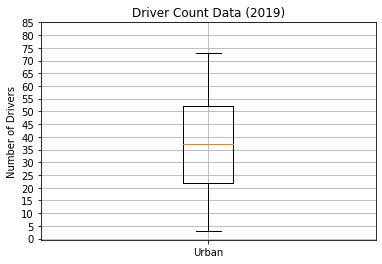

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [176]:
# Create the box-and-whisker plot for the urban driver count data.
xLabels = ['Urban']

fig,ax = plt.subplots()
ax.boxplot(urbanDrivers, labels=xLabels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urbanDrivers.describe()

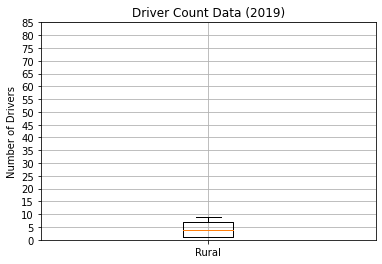

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [177]:
# Create the box-and-whisker plot for the rural driver count data.
xLabels = ['Rural']

fig,ax = plt.subplots()
ax.boxplot(ruralDrivers, labels=xLabels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
ruralDrivers.describe()

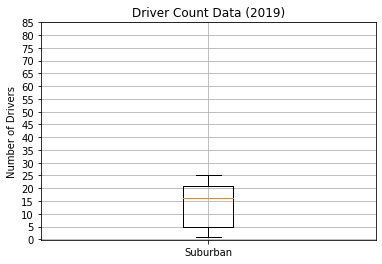

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [178]:
# Create the box-and-whisker plot for the suburban driver count data.
xLabels = ['Suburban']

fig,ax = plt.subplots()
ax.boxplot(subDrivers, labels=xLabels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
subDrivers.describe()

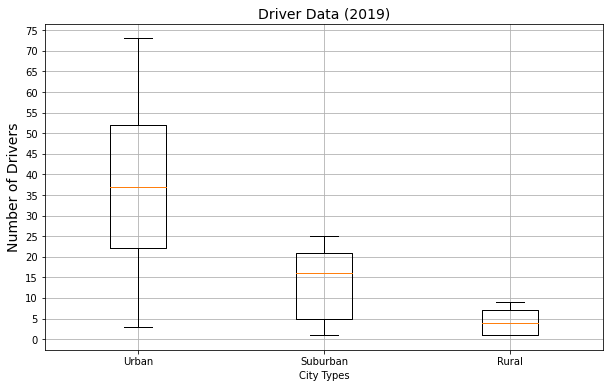

In [179]:
#Merging driver data into one whisker plot
xLabels = ['Urban','Suburban','Rural']
driverData = [urbanDrivers,subDrivers,ruralDrivers]

fig,ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Data (2019)',fontsize=14)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel('City Types')
ax.set_yticks(np.arange(0,80,step=5))
ax.boxplot(driverData,labels=xLabels)
ax.grid()
#saving figure
plt.savefig('Analysis/Fig4.png')
plt.show()


In [180]:
#Getting the sum of the Fares for each city type
sumFaresByType = pyberDataDf.groupby(['type']).sum()['fare']
sumFaresByType

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [181]:
#Getting the total fare
totalFare  = pyberDataDf['fare'].sum()
totalFare

63538.64

In [182]:
#Calculating the percentage of fare for each city type
typePercents = sumFaresByType / totalFare * 100
typePercents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [183]:
#One line version of percentage calculation
oneLineTypePerc = (pyberDataDf.groupby(['type']).sum()['fare'] / pyberDataDf['fare'].sum()) * 100
oneLineTypePerc

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

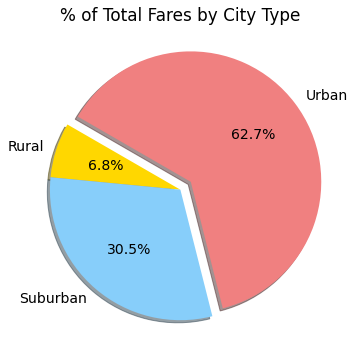

In [190]:
# Building the percentage of fares by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(typePercents,
        labels=['Rural','Suburban','Urban'],
        colors=['gold','lightskyblue','lightcoral'],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')

#changing default font size
mpl.rcParams['font.size'] = 14

#saving figure
plt.savefig('Analysis/Fig5.png')

plt.show()

In [192]:
#Calculating the percentage of rides for each city type
ridePercents = (pyberDataDf.groupby(['type']).count()['ride_id'] / pyberDataDf['ride_id'].count()) * 100
ridePercents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

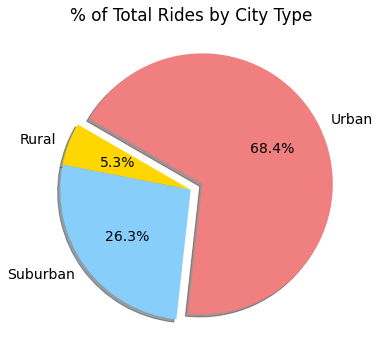

In [193]:
# Building the percentage of rides by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(ridePercents,
        labels=['Rural','Suburban','Urban'],
        colors=['gold','lightskyblue','lightcoral'],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title('% of Total Rides by City Type')

#changing default font size
mpl.rcParams['font.size'] = 14
#saving figure
plt.savefig('Analysis/Fig6.png')

plt.show()